**REST API**
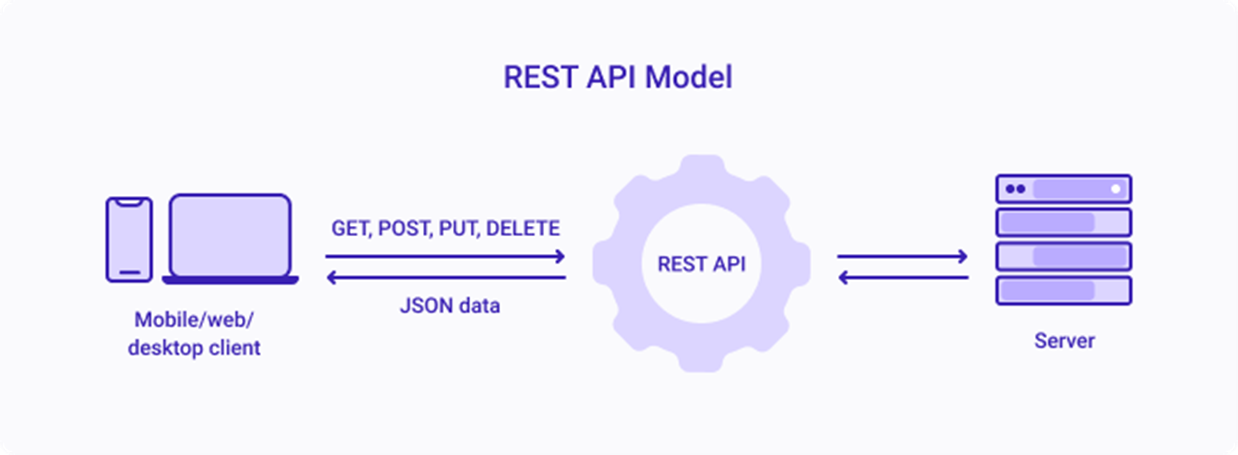




**Основные примеры использования Rest API:**

* получение данных
* создание клиентских приложений

http://universities.hipolabs.com/

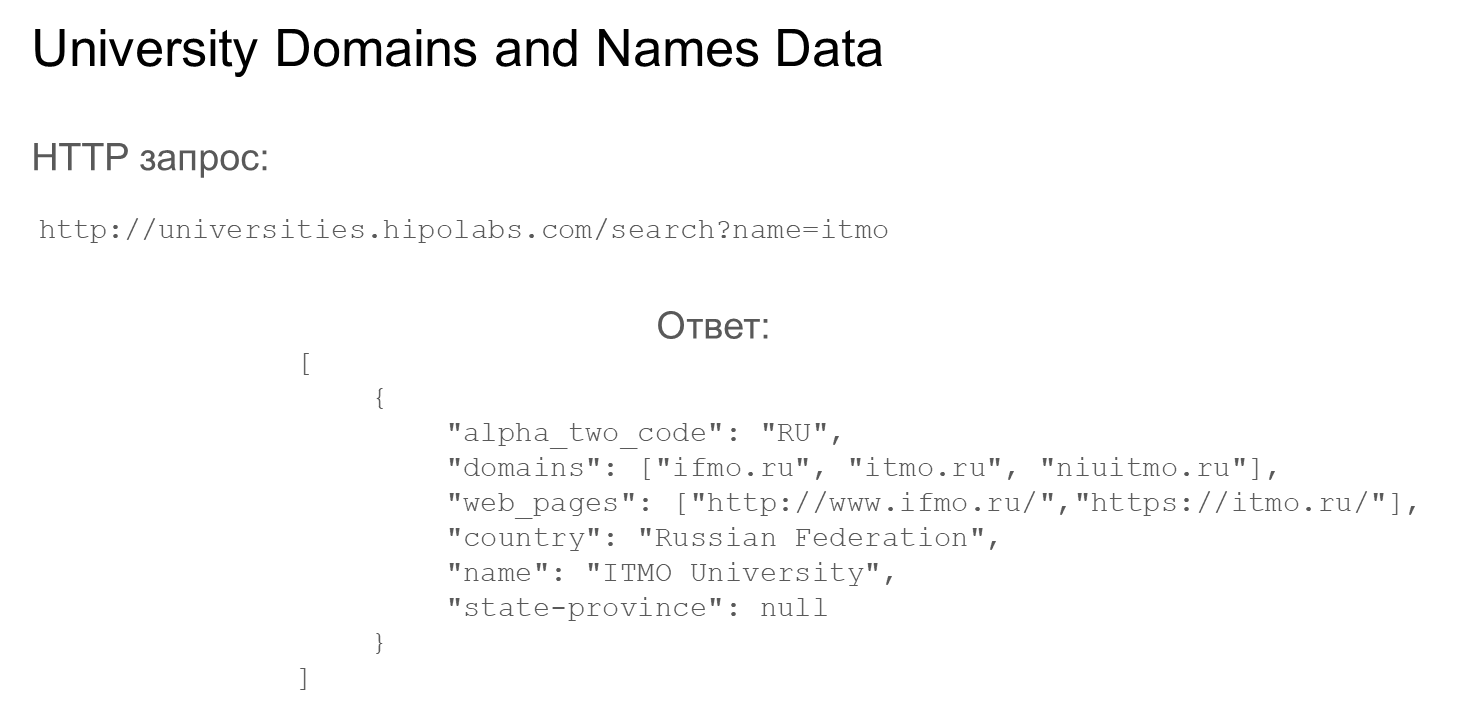

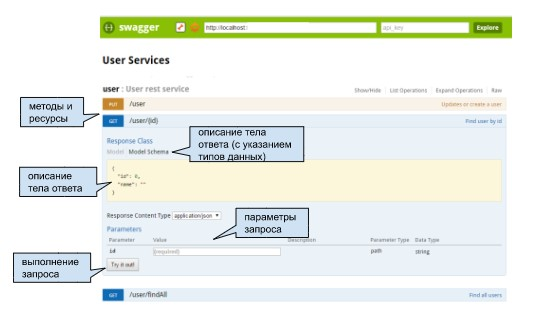

In [1]:
import requests
from bs4 import BeautifulSoup # подключение библиотеки

In [2]:
xml = requests.get('https://www.cbr-xml-daily.ru/daily_eng.xml')

In [3]:
xml.status_code

200

In [4]:
xml.headers

{'Date': 'Mon, 15 May 2023 13:59:34 GMT', 'Content-Type': 'text/xml', 'Content-Length': '1347', 'Connection': 'keep-alive', 'last-modified': 'Mon, 15 May 2023 13:00:00 GMT', 'Content-Encoding': 'gzip', 'expires': 'Mon, 15 May 2023 15:54:20 GMT', 'Cache-Control': 'max-age=28800', 'referrer-policy': 'origin', 'access-control-allow-origin': '*', 'access-control-max-age': '31536000', 'strict-transport-security': 'max-age=31536000; includeSubDomains; preload', 'link': '<https://www.cbr-xml-daily.ru/>; rel="canonical"', 'CF-Cache-Status': 'HIT', 'Age': '314', 'Accept-Ranges': 'bytes', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=Lj8ZwkvUMiD%2BI4eAB4d0iYltltG58G6wcqrIqNgMCucqN87Q2AOJnoHroTFlt%2BnUZfBP%2F6wjHB6JAguXrYWoMuGv73lFwygN8gFBNhfLydTMnPszppa0VqfdkjxA2VWBEMYPM3fvPQ%3D%3D"}],"group":"cf-nel","max_age":604800}', 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}', 'Vary': 'Accept-Encoding', 'Server': 'cloudflare', 'CF-RAY': '7c7be

In [5]:
print(xml.headers['Date'])
print(xml.headers['date'])

Mon, 15 May 2023 13:59:34 GMT
Mon, 15 May 2023 13:59:34 GMT


In [6]:
import pandas as pd

In [7]:
xml_data = BeautifulSoup(xml.text, 'lxml')
data = [] 
# перебираем
for valute in xml_data.find_all('valute'):
# извлекаем данные
 numcode = valute.findNext('numcode').contents[0]
 charcode = valute.findNext('charcode').contents[0]
 name = valute.findNext('name').contents[0]
 value = valute.findNext('value').contents[0]
 nominal = valute.findNext('nominal').contents[0]
 data.append({'numcode': numcode, 'name': name, 'charcode': charcode,'value': value})

# переводим в датафрейм
pd.DataFrame(data)

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,numcode,name,charcode,value
0,036,Australian Dollar,AUD,"52,8549"
1,944,Azerbaijan Manat,AZN,"46,5296"
2,826,British Pound Sterling,GBP,"98,6936"
3,051,Armenia Dram,AMD,"20,4272"
4,933,Belarussian Ruble,BYN,"27,3647"
5,975,Bulgarian lev,BGN,"44,0499"
6,986,Brazil Real,BRL,"16,0672"
7,348,Hungarian Forint,HUF,"23,2669"
8,704,Vietnam Dong,VND,"33,4434"
9,344,Hong Kong Dollar,HKD,"10,1087"


Кодировка

In [8]:
URL = 'https://www.cbr-xml-daily.ru/daily.xml'
xml = requests.get(URL)
xml_data = BeautifulSoup(xml.content, 'lxml')
print(xml_data.contents[0])

xml version="1.0" encoding="windows-1251"?


/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


Посмотрим, что
выводится в теге «name», не меняя кодировки:

In [9]:
xml_text = BeautifulSoup(xml.text, 'lxml')
print(xml_text.find('name'))

<name>Àâñòðàëèéñêèé äîëëàð</name>


Тело ответа анализируется как unicode (по умолчанию).
Поменяем кодировку ответного сообщения на «windows-1251»:

In [10]:
xml.encoding = 'Windows-1251'
xml_text = BeautifulSoup(xml.text, 'lxml')
print(xml_text.find('name'))

<name>Австралийский доллар</name>
